In [50]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt

In [69]:
data=pd.read_csv("C:/Users/Admin/Desktop/Book2.csv")
data

,height,weight,colour,age
0,2.0,3.0,red,2
1,6.0,8.0,black,10
2,NaN,NaN,black,6
3,4.0,NaN,brown,7
4,8.0,12.0,black,4
5,3.0,4.0,NaN,1
6,4.0,4.0,green,2
7,1.0,1.0,NaN,3


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  7 non-null      float64
 1   weight  6 non-null      float64
 2   colour  6 non-null      object 
 3   age     8 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 384.0+ bytes


In [71]:
data.isnull()

,height,weight,colour,age
0,False,False,False,False
1,False,False,False,False
2,True,True,False,False
3,False,True,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,True,False


In [81]:
data.dropna()

,height,weight,colour,age,bins
0,2.0,3.000000,red,2,child
1,6.0,8.000000,black,10,adult
2,4.0,5.333333,black,6,adult
3,4.0,5.333333,brown,7,adult
4,8.0,12.000000,black,4,child
6,4.0,4.000000,green,2,child


In [72]:
data['height'].fillna(data['height'].mean(),inplace=True)
data

,height,weight,colour,age
0,2.0,3.0,red,2
1,6.0,8.0,black,10
2,4.0,NaN,black,6
3,4.0,NaN,brown,7
4,8.0,12.0,black,4
5,3.0,4.0,NaN,1
6,4.0,4.0,green,2
7,1.0,1.0,NaN,3


In [73]:
data['weight'].fillna(data['weight'].mean(),inplace=True)
data

,height,weight,colour,age
0,2.0,3.000000,red,2
1,6.0,8.000000,black,10
2,4.0,5.333333,black,6
3,4.0,5.333333,brown,7
4,8.0,12.000000,black,4
5,3.0,4.000000,NaN,1
6,4.0,4.000000,green,2
7,1.0,1.000000,NaN,3


In [74]:
data['colour'].fillna(data['colour'].mode(),inplace=True)
data

,height,weight,colour,age
0,2.0,3.000000,red,2
1,6.0,8.000000,black,10
2,4.0,5.333333,black,6
3,4.0,5.333333,brown,7
4,8.0,12.000000,black,4
5,3.0,4.000000,NaN,1
6,4.0,4.000000,green,2
7,1.0,1.000000,NaN,3


{'whiskers': [<matplotlib.lines.Line2D at 0x1b0bbec9fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b0bbed05b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b0bbec9d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1b0bbed0b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b0bbed0e20>],
 'means': []}

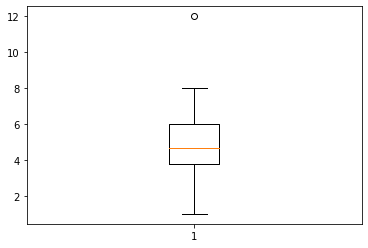

In [56]:
plt.boxplot(data['weight'])

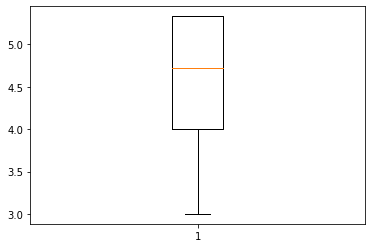

In [34]:
for i in data['weight']:
    q1=data['weight'].quantile(0.25)
    q3=data['weight'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail=q3+1.5*iqr
    if i>upper_tail or i<lower_tail:
     data['weight']=data['weight'].replace(i,np.mean(data['weight']))
plt.boxplot(data['weight'])
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(data[['height','weight','age']])
data_normalization=scaler.transform(data[['height','weight','age']])
data_normalization

array([[-0.9701425 , -0.74095857, -0.827653  ],
       [ 0.9701425 ,  0.8468098 ,  1.96023079],
       [ 0.        ,  0.        ,  0.56628889],
       [ 0.        ,  0.        ,  0.91477437],
       [ 1.940285  ,  2.1170245 , -0.13068205],
       [-0.48507125, -0.4234049 , -1.17613847],
       [ 0.        , -0.4234049 , -0.827653  ],
       [-1.45521375, -1.37606592, -0.47916753]])

In [58]:
data_normalization=pd.DataFrame(data_normalization,columns=["height","weight","age"])
data_normalization=data_normalization.join(data[data.columns.drop(["height","weight","age"])])
data_normalization

,height,weight,age,colour
0,-0.970143,-0.740959,-0.827653,red
1,0.970143,0.846810,1.960231,NaN
2,0.000000,0.000000,0.566289,black
3,0.000000,0.000000,0.914774,brown
4,1.940285,2.117024,-0.130682,black
5,-0.485071,-0.423405,-1.176138,NaN
6,0.000000,-0.423405,-0.827653,green
7,-1.455214,-1.376066,-0.479168,NaN


(array([3., 2., 1., 1., 1.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. ]),
 <BarContainer object of 5 artists>)

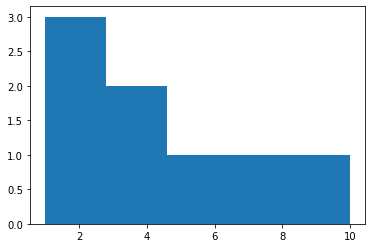

In [60]:
plt.hist(data['age'],bins=5)

In [61]:
cat_features=['height','weight','colour','age']
data=pd.get_dummies(data,columns=cat_features)
print(data.columns)

Index(['height_1.0', 'height_2.0', 'height_3.0', 'height_4.0', 'height_6.0',
       'height_8.0', 'weight_1.0', 'weight_3.0', 'weight_4.0',
       'weight_5.333333333333333', 'weight_8.0', 'weight_12.0', 'colour_black',
       'colour_brown', 'colour_green', 'colour_red', 'age_1', 'age_2', 'age_3',
       'age_4', 'age_6', 'age_7', 'age_10'],
      dtype='object')


In [77]:
data['bins']=pd.cut(x=data['age'],bins=[1,5,10,20],
              labels=['child','adult','aged'])
data
print(data['bins'].unique())

,height,weight,colour,age,bins
0,2.0,3.000000,red,2,child
1,6.0,8.000000,black,10,adult
2,4.0,5.333333,black,6,adult
3,4.0,5.333333,brown,7,adult
4,8.0,12.000000,black,4,child
5,3.0,4.000000,NaN,1,NaN
6,4.0,4.000000,green,2,child
7,1.0,1.000000,NaN,3,child


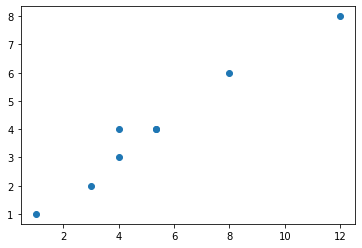

In [80]:
plt.scatter(data['weight'],data['height'])